### [데이터 시각화 - 남북한발전전력량]
- 엑셀파일 => DataFrame

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
# 판다스 출력 옵션
pd.options.display.max_colwidth = None

# 데이터 준비
DATA_FILE = '../DATA/남북한발전전력량.xlsx'

# EXCEL => DataFrame : openpyxl 패키지 필요
dataDF = pd.read_excel(DATA_FILE)

In [3]:
# 데이터 확인
display(dataDF.head(10))
dataDF.info()

# 기본적인 전처리--------------------------------------
# 전력량에 결측치 처리
# 신재생행 추가
# 행 합계 추가(남북한 합계)
# 열 합계 추가(항목별 합계)
# ---------------------------------------------------

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

[2] 전처리 <hr>

In [4]:
# [2-1] 불필요 데이터 제거 
# 전력량에 결측치 처리?
# 신재생행 추가
# 행 합계 추가(남북한 합계)
# 열 합계 추가(항목별 합계)

In [5]:
# -> 결측치
dataDF.isna().sum()

# dataDF['전출지별'].fillna(method='ffill')
dataDF['전력량 (억㎾h)'] = dataDF['전력량 (억㎾h)'].ffill() # ffill(): 'forward fill' (앞쪽 방향 채우기)
# display(dataDF)

In [6]:
# -> 이상문자 '-' 거의 모든 컬럼에 존재 : 없다는 의미로 사용 => 0
dataDF = dataDF.replace('-', 0)
display(dataDF)
dataDF.isna().sum()


C:\Users\khw27\AppData\Local\Temp\ipykernel_17216\2934035842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF = dataDF.replace('-', 0)


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


전력량 (억㎾h)    0
발전 전력별       0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
dtype: int64

In [7]:
# 연도 컬럼(2번째부터 마지막 컬럼까지)
year_cols = dataDF.columns[2:]

# 기존 남북합계 행 삭제
dataDF = dataDF[dataDF['전력량 (억㎾h)'] != '남북합계']

# 남한, 북한 데이터 필터링
south = dataDF[dataDF['전력량 (억㎾h)'] == '남한']
north = dataDF[dataDF['전력량 (억㎾h)'] == '북한']

# 북한 신재생 행 추가

new_row = {'전력량 (억㎾h)': '북한', '발전 전력별': '신재생'}
for col in year_cols:
    new_row[col] = 0
dataDF = pd.concat([dataDF, pd.DataFrame([new_row])], ignore_index=True)

# 남북합계 행 생성
sum_row = {'전력량 (억㎾h)': '남북한합계', '발전 전력별': ''}
for col in year_cols:
    sum_row[col] = south[col].sum() + north[col].sum()

# 데이터프레임에 합계 행 추가
dataDF = pd.concat([dataDF, pd.DataFrame([sum_row])], ignore_index=True)

# 각 행별 총합 열 추가
dataDF['항목별 총합'] = dataDF[year_cols].sum(axis=1)

# 결과 확인
display(dataDF.tail(20))


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,항목별 총합
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4224,4336,4747,4969,5096,5171,5220,5281,5404,88523
1,남한,수력,64,51,49,60,41,55,52,54,...,56,56,65,78,77,84,78,58,66,1599
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2658,2802,3196,3343,3430,3581,3427,3402,3523,55136
3,남한,원자력,529,563,565,581,587,670,739,771,...,1510,1478,1486,1547,1503,1388,1564,1648,1620,31067
4,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,86,118,151,173,195,723
5,북한,합계,277,263,247,221,231,230,213,193,...,255,235,237,211,215,221,216,190,239,5914
6,북한,수력,156,150,142,133,138,142,125,107,...,141,125,134,132,135,139,130,100,128,3408
7,북한,화력,121,113,105,88,93,88,88,86,...,114,110,103,79,80,82,86,90,111,2506
8,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,북한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[3] 발전전력량의 변화

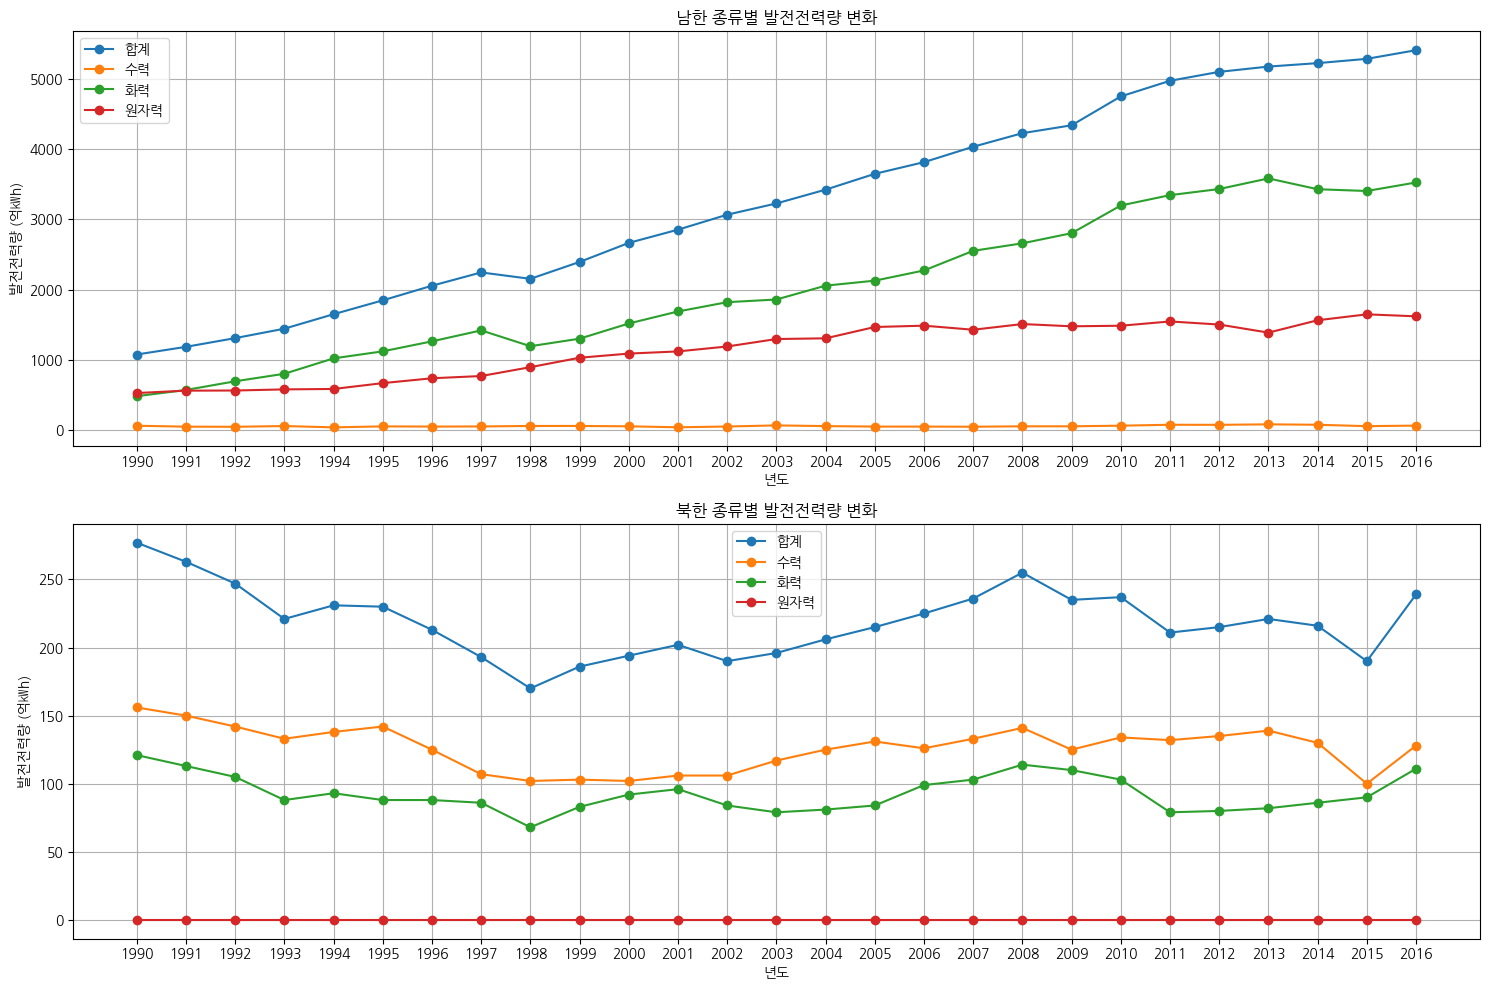

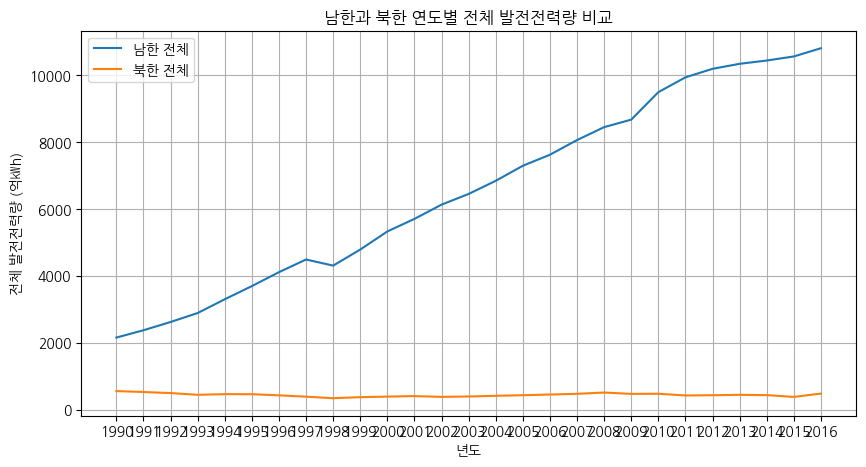

In [8]:
# 각 연도별 전체 발전량 계산
south_total = south[year_cols].sum(axis=0)
north_total = north[year_cols].sum(axis=0)

# 그래프 그리기
plt.figure(figsize=(15, 10))
# 남한 종류별 변화
plt.subplot(2, 1, 1)
for item in south['발전 전력별'].unique():
    if item != '신재생':
        plt.plot(year_cols, south[south['발전 전력별'] == item].iloc[0, 2:], label=item, marker='o')
plt.title('남한 종류별 발전전력량 변화')
plt.xlabel('년도')
plt.ylabel('발전전력량 (억㎾h)')
plt.legend()
plt.grid(True)

# 북한 종류별 변화
plt.subplot(2, 1, 2)
for item in north['발전 전력별'].unique():
    if item != '신재생':
        plt.plot(year_cols, north[north['발전 전력별'] == item].iloc[0, 2:], label=item, marker='o')
plt.title('북한 종류별 발전전력량 변화')
plt.xlabel('년도')
plt.ylabel('발전전력량 (억㎾h)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 전체 연도별 남북한 발전량 총합 비교
plt.figure(figsize=(10, 5))
plt.plot(year_cols, south_total.values, label='남한 전체')
plt.plot(year_cols, north_total.values, label='북한 전체')
plt.title('남한과 북한 연도별 전체 발전전력량 비교')
plt.xlabel('년도')
plt.ylabel('전체 발전전력량 (억㎾h)')
plt.legend()
plt.grid(True)
plt.show()